In [1]:
import pandas as pd
info_filename1 = r"E:\pycharm files\housing_pricing_model\data\train_data.csv"
info_filename2 = r"E:\pycharm files\housing_pricing_model\data\jw.csv"
df_data = pd.read_csv(info_filename1,encoding="gbk")
df_jw = pd.read_csv(info_filename2,encoding="utf-8")
df_data = df_data.iloc[:,1:53]
df = pd.concat([df_data,df_jw],axis=1)


In [2]:
i = len(df.columns)
df_X = df.iloc[:,1:i]
df_y = df.iloc[:,[0]]

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def scalerXY(df_X,df_y):
    scalerX = StandardScaler()
    scalery = MinMaxScaler()
    
    df_scaledX = pd.DataFrame(scalerX.fit_transform(df_X), columns=df_X.columns)
    df_scaledy = pd.DataFrame(scalery.fit_transform(df_y), columns=df_y.columns)
    
    df_scaledy = df_scaledy *0.98+0.01
    df_scaledX = df_scaledX*0.98+0.01
    
    return (scalerX,scalery,df_scaledX,df_scaledy)


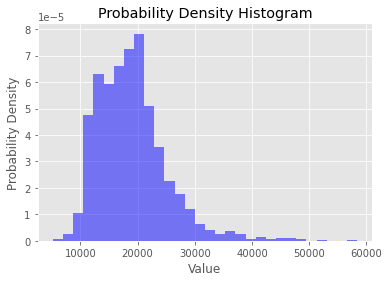

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style
style.use('ggplot')

# 生成一组随机数据
data = df_y

# 绘制概率密度图
plt.hist(data, bins=30, density=True, alpha=0.5, color='blue')

# 添加标题和标签
plt.title("Probability Density Histogram")
plt.xlabel("Value")
plt.ylabel("Probability Density")

# 显示图形
plt.show()